<a href="https://www.kaggle.com/code/mdraiesh9648/time-series-analysis-of-air-passenger?scriptVersionId=108765593" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Time series analysis of Air Passenger 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Read the data
df1 = pd.read_csv('../input/air-passenger-datasets/AirPassenger.csv')

In [3]:
# Check data types
df1.dtypes

Year-Month    object
Pax            int64
dtype: object

In [4]:
# We are providing inputs to tell pandas that we are trying to work with time series
df1 = pd.read_csv('../input/air-passenger-datasets/AirPassenger.csv', parse_dates = ['Year-Month'])

In [5]:
df1.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

In [6]:
df1.head()

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
# It is recommended that we make our time series reference as the index
df1 = pd.read_csv('../input/air-passenger-datasets/AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month')

In [8]:
df1.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
# We can conveniently do slicing i.e. obtain data for a specific time period
df1['1951-04-01':'1952-03-01']

,Pax
Year-Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [10]:
# We can check values corresponding to a specific time point
df1.loc['1960-05-01']

Pax    472
Name: 1960-05-01 00:00:00, dtype: int64

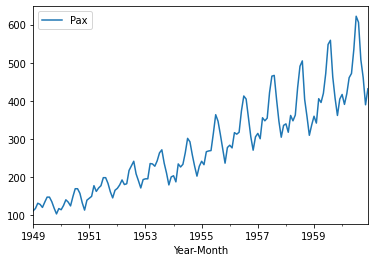

In [11]:
# Plot the time series
df1.plot()
plt.show()

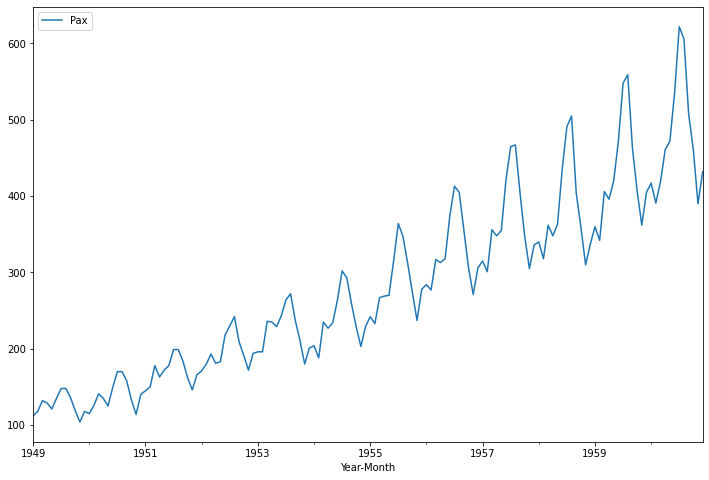

In [12]:
# Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df1.plot()
plt.show()

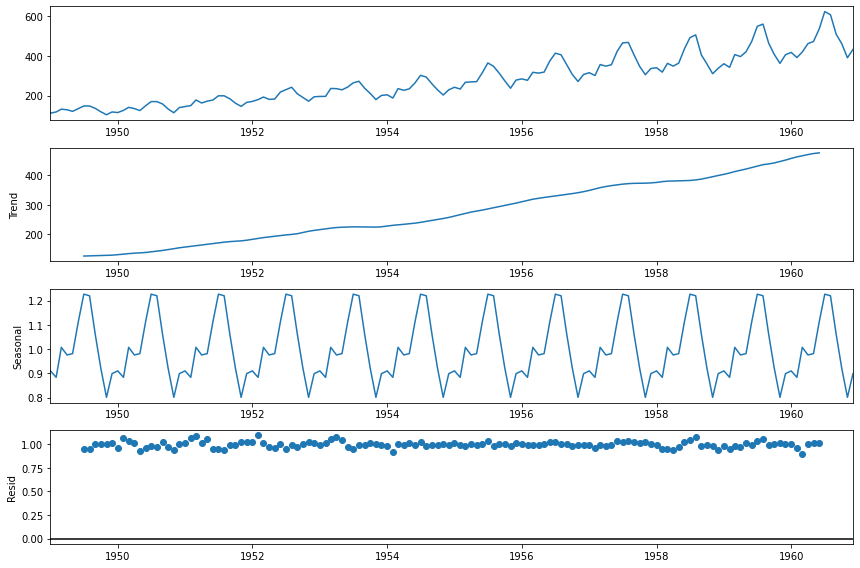

In [13]:
# Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1,model="multiplicative")
df1_mul_decompose.plot()
plt.show()

In [14]:
# Lets try to do log transformation
df1_log = df1.copy()

In [15]:
df1_log['Pax'] = np.log(df1)

In [16]:
df1_log.Pax

Year-Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: Pax, Length: 144, dtype: float64

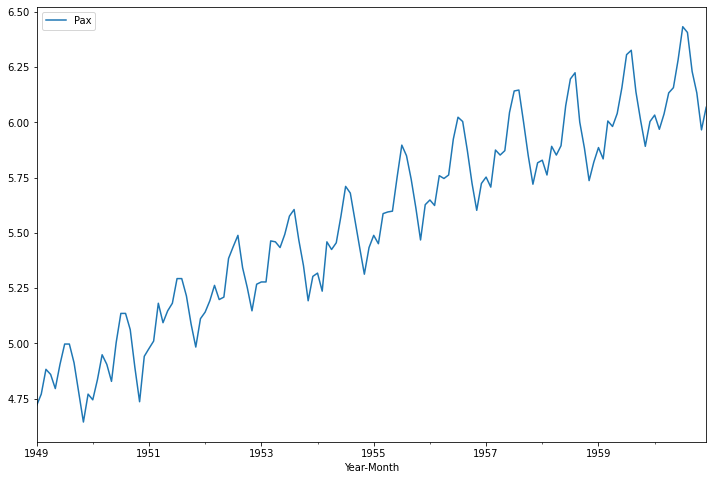

In [17]:
# Visualize the log transformed series
df1_log.plot()
plt.show()

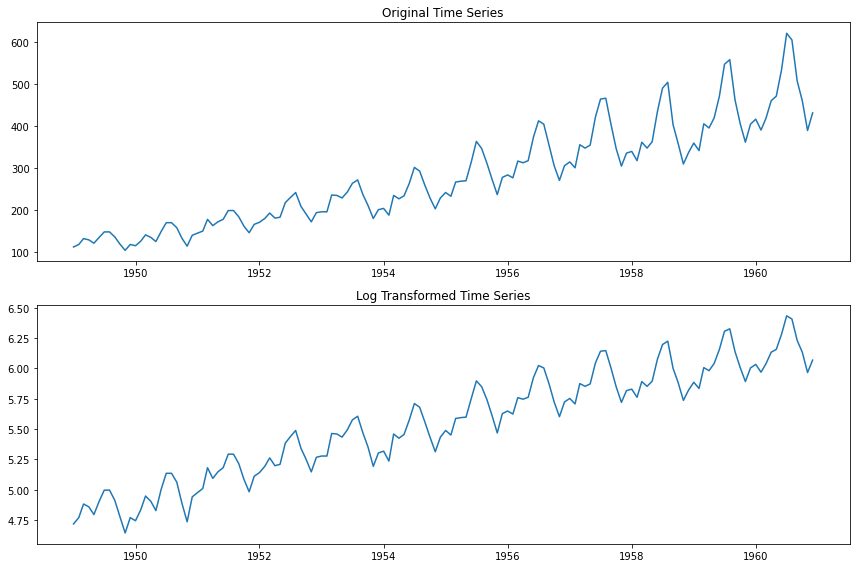

In [18]:
# Compare with the original series

plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()